### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import layers 

In [2]:
# specifying dataset paths
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
# since everyimage is of different size to convert into fixed size
image_width = 180
image_length = 180

In [4]:
# to convert the train dataset into arrays we use tf functionality
data_train = tf.keras.utils.image_dataset_from_directory(

    data_train_path, # dataset path

    shuffle = True, # dataset shuffling

    image_size = (image_width,image_length), # to resize the image

    batch_size = 32, # batch_size=32: This means that the dataset is divided into batches of 32 images each
    
    validation_split =False    # if the dataset is not previuosly divided into traning and validation this can help

)

Found 3115 files belonging to 36 classes.


In [5]:
data_train.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [6]:
# storing different category
data_cat = data_train.class_names

In [7]:
# to convert the  val dataset into arrays we use tf functionality
data_val = tf.keras.utils.image_dataset_from_directory(

    data_val_path, # dataset path

    shuffle = False, # dataset shuffling

    image_size = (image_width,image_length), # to resize the image

    batch_size = 32, # batch_size=32: This means that the dataset is divided into batches of 32 images each
    
    validation_split =False    # if the dataset is not previuosly divided into traning and validation this can help

)

Found 351 files belonging to 36 classes.


In [8]:
# to convert the  test dataset into arrays we use tf functionality
data_val = tf.keras.utils.image_dataset_from_directory(

    data_test_path, # dataset path

    shuffle = False, # dataset shuffling

    image_size = (image_width,image_length), # to resize the image

    batch_size = 32, # batch_size=32: This means that the dataset is divided into batches of 32 images each
    
    validation_split =False    # if the dataset is not previuosly divided into traning and validation this can help

)

Found 359 files belonging to 36 classes.


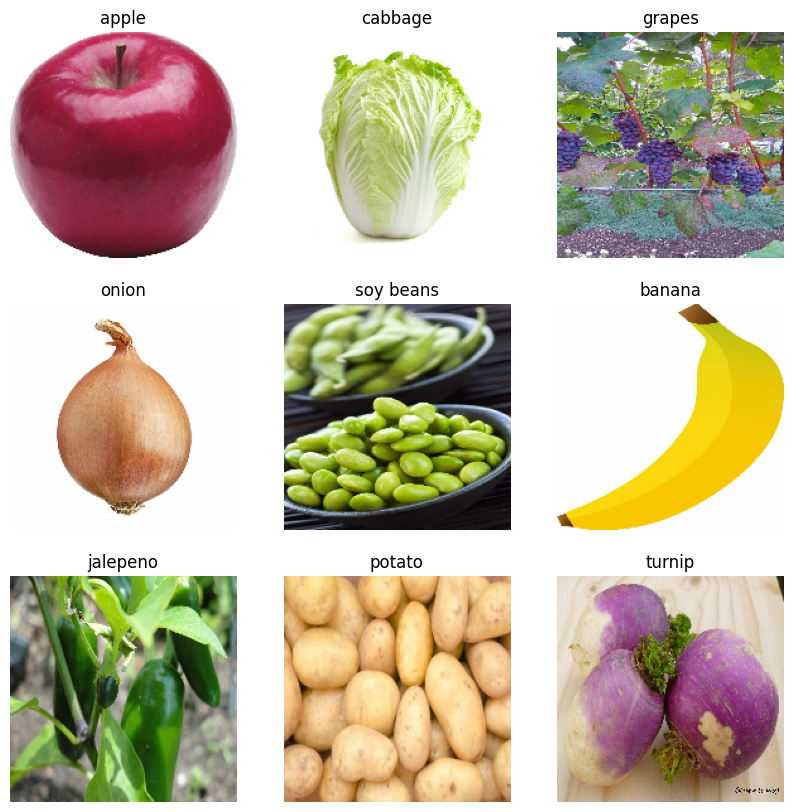

In [9]:
# to display images
plt.figure(figsize=(10,10)) # This line creates a new figure for plotting with a specified size of 10 inches by 10 inches

for image, labels in data_train.take(1): # This function takes the first batch of images and labels from the data_train dataset.

    for i in range(9): # This loop runs 9 times, allowing you to display 9 images (in a 3x3 grid).

        plt.subplot(3,3,i+1) # create subplot 3,3: Specifies a 3x3 grid of subplots, i - position

        plt.imshow(image[i].numpy().astype('uint8')) # .numpy(): Converts the TensorFlow tensor to a NumPy 

        plt.title(data_cat[labels[i]]) # used for title labels[i]: Retrieves the label for the i-th image in the batch,  maps label indices to category names. 
        
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential([
    layers.Rescaling(1/255), # pixel value [0-255] to [0-1]
    layers.Conv2D(16,3,padding = 'same',activation='relu'), # 16 filters size 3*3 to detect features
    layers.MaxPooling2D(), # padding same ensures the output feature map is same as input feature map by adding zero around bordes
    layers.Conv2D(32,3,padding ='same',activation='relu'),
    layers.MaxPooling2D(), # performs down-sampling helping to reduce computational complexity and control overfitting
    layers.Conv2D(64,3,padding ='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(), # converts the 2D feature maps into a 1D vector.
    layers.Dropout(0.2), # randomly sets 20% of the input units to zero during training
    layers.Dense(128),
    layers.Dense(len(data_cat))
    
])

In [12]:
# Maxpooling It looks at small areas of the image (like a 2x2 grid) and keeps only the most important part (the highest value, or "maximum").
# After the network identifies important features in an image (like edges or textures), MaxPooling helps to make these features smaller and more focused.

# Dense Layer - The Dense layer takes the learned features and makes the final decision, combining and refining the information to classify the input or make predictions.

In [13]:
model.compile(optimizer = 'adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [14]:
epochs_size = 10
history = model.fit(data_train,validation_data = data_val,epochs = epochs_size,verbose=1)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 334ms/step - accuracy: 0.0573 - loss: 4.1292 - val_accuracy: 0.3426 - val_loss: 2.5108
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 277ms/step - accuracy: 0.2361 - loss: 2.7047 - val_accuracy: 0.5237 - val_loss: 1.6672
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 277ms/step - accuracy: 0.4080 - loss: 2.0840 - val_accuracy: 0.7437 - val_loss: 0.9921
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 283ms/step - accuracy: 0.6012 - loss: 1.4256 - val_accuracy: 0.8412 - val_loss: 0.6641
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - accuracy: 0.7602 - loss: 0.8408 - val_accuracy: 0.8942 - val_loss: 0.4770
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 306ms/step - accuracy: 0.8447 - loss: 0.5406 - val_accuracy: 0.9387 - val_loss: 0.3365
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 316ms/step - accuracy: 0.8925 - loss: 0.3835 - val_accuracy: 0.9443 - val_loss: 0.3371
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 333ms/step - accuracy: 0.9155 - loss: 0.3035 - val_accu

Text(0.5, 1.0, 'Loss')

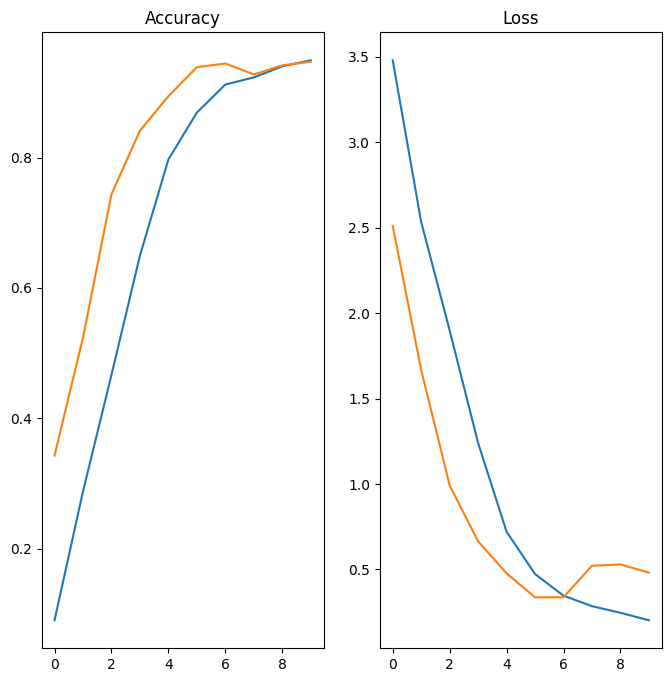

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Traning Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Traning loss')
plt.plot(epochs_range,history.history['val_loss'],label = 'Validation loss')
plt.title('Loss')

In [16]:
image =r'Fruits_Vegetables\red_pepper.jpg'
image = tf.keras.utils.load_img(image, target_size=(image_length,image_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0) # This line adds an extra dimension to the image array, making it a "batch" of one image.

In [17]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [18]:
score = tf.nn.softmax(predict)

In [19]:
score

<tf.Tensor: shape=(1, 36), dtype=float32, numpy=
array([[7.74028063e-01, 2.23317166e-16, 1.55233067e-06, 1.62484546e-04,
        6.71698938e-12, 1.05641358e-01, 6.67210843e-04, 1.99433891e-17,
        1.20509903e-04, 7.00259512e-13, 6.40527735e-12, 5.15846284e-15,
        5.07151713e-16, 1.61952633e-16, 1.77265537e-13, 1.74681077e-06,
        1.01962919e-13, 1.18985575e-19, 4.91832215e-13, 1.13260455e-07,
        1.74155299e-04, 1.80001125e-09, 7.04950700e-03, 2.43721776e-09,
        8.05409409e-14, 8.13232945e-13, 8.86678044e-03, 1.97489577e-11,
        1.25945617e-05, 8.95210487e-16, 1.28882814e-14, 8.37434476e-17,
        2.51764186e-06, 9.92937014e-02, 6.86258339e-09, 3.97777185e-03]],
      dtype=float32)>

In [20]:
'''
score: This is an array of probabilities output by the model for each category (e.g., if there are 3 categories, score might look something like [0.1, 0.7, 0.2]).
np.argmax(score): This function finds the index of the highest value in the score array. In the example [0.1, 0.7, 0.2], np.argmax(score) would return 1 because 0.7 is the highest value.
data_cat: This is a list or array containing the names of the categories (e.g., ['Apple', 'Banana', 'Carrot']).
data_cat[np.argmax(score)]: This uses the index found by np.argmax(score) to select the corresponding category name. In our example, it would return 'Banana'
{}: These are placeholders within the string that will be replaced by the values provided in the format() function.
'''

"\nscore: This is an array of probabilities output by the model for each category (e.g., if there are 3 categories, score might look something like [0.1, 0.7, 0.2]).\nnp.argmax(score): This function finds the index of the highest value in the score array. In the example [0.1, 0.7, 0.2], np.argmax(score) would return 1 because 0.7 is the highest value.\ndata_cat: This is a list or array containing the names of the categories (e.g., ['Apple', 'Banana', 'Carrot']).\ndata_cat[np.argmax(score)]: This uses the index found by np.argmax(score) to select the corresponding category name. In our example, it would return 'Banana'\n{}: These are placeholders within the string that will be replaced by the values provided in the format() function.\n"

In [21]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is apple with accuracy of 77.40


In [22]:
model.save('Image_Classify.keras')